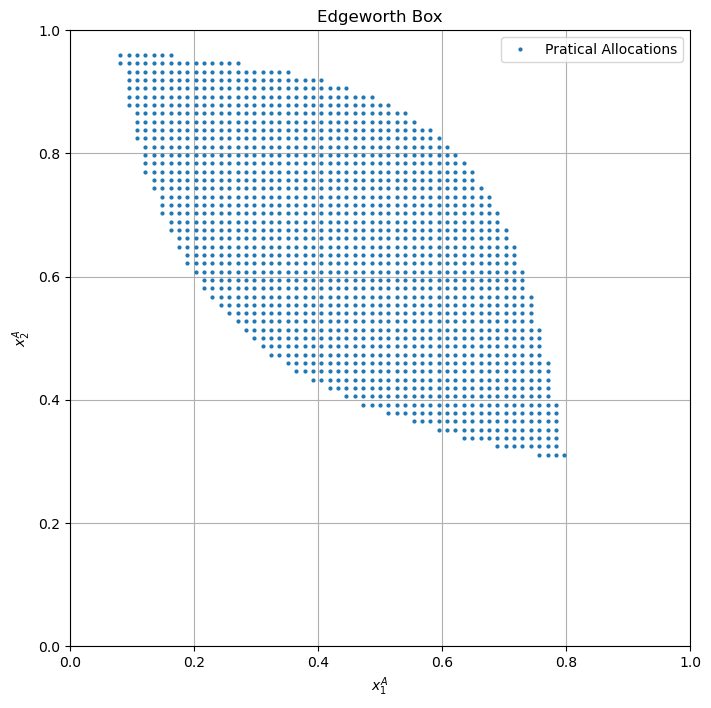

In [8]:
#we start of by importing
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from scipy.optimize import fsolve
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from scipy import optimize

#Here after we define the values in the enconomy
class ExchangeEconomyClass:

    def __init__(self):
        par = self.par = SimpleNamespace()

        # a. preferences
        par.alpha = 1/3
        par.beta = 2/3

        # b. endowments
        par.w1A = 0.8
        par.w2A = 0.3
        par.w1B = 1 - par.w1A
        par.w2B = 1 - par.w2A

    def utility_A(self, x1A, x2A):
        
        return (x1A ** self.par.alpha) * (x2A ** (1 - self.par.alpha))

    def utility_B(self, x1B, x2B):
        
        return (x1B ** self.par.beta) * (x2B ** (1 - self.par.beta))

    def demand_A(self, p1):
        budget = self.par.w1A * p1 + self.par.w2A
        x1A = (self.par.alpha / p1) * budget
        x2A = ((1 - self.par.alpha) / 1) * budget  # p2 is the numeraire and equals 1
        return x1A, x2A

    def demand_B(self, p1):
        budget = self.par.w1B * p1 + self.par.w2B
        x1B = (self.par.beta / p1) * budget
        x2B = ((1 - self.par.beta) / 1) * budget  # p2 is the numeraire and equals 1
        return x1B, x2B

    def check_market_clearing(self, p1):
        
        x1A, x2A = self.demand_A(p1)
        x1B, x2B = self.demand_B(p1)

        # Calculate excess demand for both goods
        eps1 = x1A + x1B - 1  # Total endowment for good 1 is 1
        eps2 = x2A + x2B - 1  # Total endowment for good 2 is 1

        return eps1, eps2


economy = ExchangeEconomyClass()
par = economy.par

# Find the initial utilities
initial_utility_A = economy.utility_A(par.w1A, par.w2A)
initial_utility_B = economy.utility_B(1 - par.w1A, 1 - par.w2A)


w1bar = 1.0
w2bar = 1.0

# We use N as spicifed in the task
N = 75
x1A_values = np.linspace(0, w1bar, N)
x2A_values = np.linspace(0, w2bar, N)


Practical_x1A = []
Practical_x2A = []

# we here check for the allcoations 
for x1A in x1A_values:
    for x2A in x2A_values:
        utility_A = economy.utility_A(x1A, x2A)
        utility_B = economy.utility_B(w1bar - x1A, w2bar - x2A)
        if utility_A >= initial_utility_A and utility_B >= initial_utility_B:
            Practical_x1A.append(x1A)
            Practical_x2A.append(x2A)

# Convert the list to a numpy array for plotting
feasible_allocations = np.column_stack((Practical_x1A, Practical_x2A))

# Plotting the Edgeworth box
plt.figure(figsize=(8, 8))
plt.plot(feasible_allocations[:, 0], feasible_allocations[:, 1], 'o', markersize=2, label='Pratical Allocations')
plt.xlim((0.0, 1.0))
plt.ylim((0.0, 1.0))
plt.xlabel('$x_1^A$')
plt.ylabel('$x_2^A$')
plt.title('Edgeworth Box')
plt.grid(True)
plt.legend()
plt.show()

Here is the plot of the edworthbox, what is shown is the better allcations.

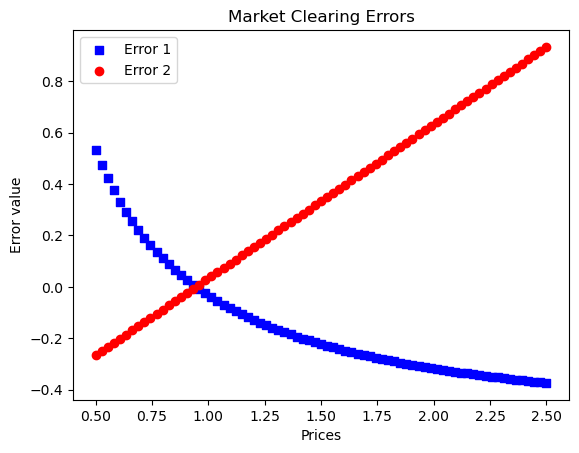

In [9]:
# 2)
#Generates an array of N evenly spaced prices. 
#These prices will be used to assess how the market clearing error changes as the price varies within this range.
p_values = np.linspace(0.5, 2.5, N)

ErrorList1 = []
ErrorList2 = []
# for the for loop. 
#Calls economy.check_market_clearing(price), which is a method expected to calculate and return two types of market clearing errors at the given price.
for price in p_values:
    error1, error2 = economy.check_market_clearing(price)
    ErrorList1.append(error1)
    ErrorList2.append(error2)

# Plots the data points on a scatter plot with the prices on the x-axis and the market clearing errors on the y-axis.
plt.scatter(p_values, ErrorList1, marker='s', color='blue', label='Error 1')
plt.scatter(p_values, ErrorList2, marker='o', color='red', label='Error 2')
plt.xlabel('Prices')
plt.ylabel('Error value')
plt.title('Market Clearing Errors')
plt.legend()
plt.show()

what is shown here, we can see the price of good one compared to the combined markets error 

In [10]:
#Making a combined market error 
combined_error = np.array(ErrorList1) + np.array(ErrorList2)
min_error_index = np.argmin(combined_error)
optimal_price = p_values[min_error_index]

# This segment identifies the price that minimizes the total market clearing error and uses it to find the most favorable demand and associated utility for both agents in the market
demand_A_optimal = economy.demand_A(optimal_price)
demand_B_optimal = economy.demand_B(optimal_price)
utility_A_optimal = economy.utility_A(*demand_A_optimal)
utility_B_optimal = economy.utility_B(*demand_B_optimal)

# Display results
print(f'optimal price is: {optimal_price}')
print(f'allocation for A is: ({demand_A_optimal[0]}, {demand_A_optimal[1]})')
print(f'allocation for B is: ({demand_B_optimal[0]}, {demand_B_optimal[1]})')
print(f'utility for A: {utility_A_optimal}')
print(f'utility for B: {utility_B_optimal}')
print(f'Total utility : {utility_A_optimal + utility_B_optimal}')

optimal price is: 0.9594594594594594
allocation for A is: (0.37089201877934275, 0.7117117117117118)
allocation for B is: (0.6197183098591549, 0.2972972972972973)
utility for A: 0.5727326005035266
utility for B: 0.485131944094543
Total utility : 1.0578645445980697


As we can see the optimal price is: 0.95 
the rest of the numbers are listed. 


In [14]:
#4.a
#Generate a sequence of potential market prices within the given range for analysis.


def calculate_utility_and_allocations(economy, N=75):
    # Generate a range of prices
    p_values = np.linspace(0.5, 2.5, N)
    utility_list_A = []

    # Calculate utility for agent A across a range of prices
    for price in p_values:
        # Calculate consumer B's demand for both goods at the given price
        x1B, x2B = economy.demand_B(price)
        
        # Derive consumer A's allocation as the residual of total endowment after B's demand
        x1A, x2A = 1 - x1B, 1 - x2B
        
        # Calculate consumer A's utility
        utilityA = economy.utility_A(x1A, x2A)
        utility_list_A.append(utilityA)

    # Convert lists to NumPy arrays
    p_values_array = np.array(p_values)
    utility_list_A_array = np.array(utility_list_A)

    # Filter out non-feasible utility values
    feasible_util = ~np.isnan(utility_list_A_array)
    filtered_utilities = utility_list_A_array[feasible_util]
    filtered_p_values = p_values_array[feasible_util]

    # Find the index of the maximum utility
    max_utility_index = np.argmax(filtered_utilities)
    optimal_price = filtered_p_values[max_utility_index]

    # Determine market equilibrium allocations for both consumers using the optimal price
    Allocation_x1B, Allocation_x2B = economy.demand_B(optimal_price)
    Allocation_x1A, Allocation_x2A = 1 - Allocation_x1B, 1 - Allocation_x2B

    return optimal_price, (Allocation_x1A, Allocation_x2A), (Allocation_x1B, Allocation_x2B)


optimal_price, allocation_A, allocation_B = calculate_utility_and_allocations(economy)
print(f'Optimal price: {optimal_price}')
print(f'Allocation for A: {allocation_A}')
print(f'Allocation for B: {allocation_B}')


Optimal price: 1.9054054054054055
Allocation for A: (0.6217494089834517, 0.6396396396396397)
Allocation for B: (0.37825059101654834, 0.36036036036036034)


C:\Users\lyngb\AppData\Local\Temp\ipykernel_8920\2722669765.py:28: RuntimeWarning: invalid value encountered in scalar power
  return (x1A ** self.par.alpha) * (x2A ** (1 - self.par.alpha))


In [29]:
#4.b
# Define a function to calculate the negative utility of consumer A.
# This function is used for optimization since 'minimize' seeks to minimize the function, and we are interested in maximizing utility.
def new_utility_A(price, economy):
    # Retrieve the demand of consumer B given the price and then calculate consumer A's remaining allocation.
    x1B, x2B = economy.demand_B(price)
    x1A, x2A = 1 - x1B, 1 - x2B
    return -economy.utility_A(x1A, x2A)  # Return the negative utility of A for the optimizer to minimize.

def calculate_optimal_price_and_allocations(initial_price, price_bounds, economy):
    # Run the optimization to find the price that maximizes consumer A's utility.
    result = minimize(new_utility_A, initial_price, bounds=price_bounds, args=(economy,))

    # Extract the optimal price from the optimization result.
    optimal_price = result.x[0]

    # Calculate the optimal allocations for consumer A and B using the optimal price.
    Allocation_x1B, Allocation_x2B = economy.demand_B(optimal_price)
    Allocation_x1A, Allocation_x2A = 1 - Allocation_x1B, 1 - Allocation_x2B

    return optimal_price, (Allocation_x1A, Allocation_x2A), (Allocation_x1B, Allocation_x2B)

# Example usage:
initial_price = [1.0]  # Initial guess for the optimizer
price_bounds = [(0, None)]  # Bounds indicate that price should be between 0 and infinity
optimal_price, allocation_A, allocation_B = calculate_optimal_price_and_allocations(initial_price, price_bounds, economy)

# Output the results: the optimal price and corresponding allocations for consumers A and B.
print(f'The chosen price will be: {optimal_price}')
print(f'Allocation for A: {allocation_A}')
print(f'Allocation for B: {allocation_B}')
print(f'Utility for A: {economy.utility_A(*allocation_A)}')
print(f'Utility for B: {economy.utility_B(*allocation_B)}')
print(f'Total utility: {economy.utility_A(*allocation_A) + economy.utility_B(*allocation_B)}')


The chosen price will be: 1.8992871839426275
Allocation for A: (0.6209604508757832, 0.6400475210704915)
Allocation for B: (0.3790395491242168, 0.3599524789295085)
Utility for A: 0.6336208505887345
Utility for B: 0.3725673054168594
Total utility: 1.0061881560055939


Just as in 4a, we here find the price

In [22]:
#5a
# Pair up feasible allocations of goods x1 and x2 for consumer A into a list of tuples.
Practical_allocations = list(zip(Practical_x1A, Practical_x2A))
feasible_utilities_A = []

# Evaluate the utility of consumer A for each feasible pair of goods and store the utilities.
for allocation in Practical_allocations:
    utility_A = economy.utility_A(*allocation)  # Calculate utility for the current allocation
    feasible_utilities_A.append(utility_A)

# Find the highest utility value from the list of feasible utilities and identify the corresponding allocation.
Optimal_utility = max(feasible_utilities_A)
Optimal_utility_index = feasible_utilities_A.index(Optimal_utility)
Optimal_allocation = feasible_allocations[Optimal_utility_index] # The allocation corresponding to the maximum utility

# Output the best allocation for consumer A and the maximum utility achieved by this allocation.
print(f'allocation for A : ({Optimal_allocation[0]}, {Optimal_allocation[1]})')
print(f' utility for A: {Optimal_utility}')



allocation for A : (0.5810810810810811, 0.8378378378378379)
 utility for A: 0.741627044262768


In [27]:
def objective(x, economy):
    x1A, x2A = x
    return -economy.utility_A(x1A, x2A)

def constraint(x, economy, w1bar, w2bar, initial_utility_B):
    x1A, x2A = x
    w1B, w2B = w1bar - x1A, w2bar - x2A
    return economy.utility_B(w1B, w2B) - initial_utility_B

def optimize_allocation(economy, par, w1bar, w2bar, initial_utility_B):
    # Initial guess for the allocation
    x0 = [par.w1A, par.w2A]

    # Bounds for the allocations
    bounds = [(0, w1bar), (0, w2bar)]

    # Constraint dictionary
    cons = {'type': 'ineq', 'fun': lambda x: constraint(x, economy, w1bar, w2bar, initial_utility_B)}

    # Solve the optimization problem
    result = minimize(objective, x0, args=(economy,), method='SLSQP', bounds=bounds, constraints=cons)

    if result.success:
        optimal_x1A, optimal_x2A = result.x
        optimal_x1B, optimal_x2B = w1bar - optimal_x1A, w2bar - optimal_x2A
        total_utility = economy.utility_A(optimal_x1A, optimal_x2A) + economy.utility_B(optimal_x1B, optimal_x2B)
        return (optimal_x1A, optimal_x2A), (optimal_x1B, optimal_x2B), total_utility
    else:
        return None, None, None

# Example usage:
optimal_allocation_A, optimal_allocation_B, total_utility = optimize_allocation(economy, par, w1bar, w2bar, initial_utility_B)
if optimal_allocation_A is not None:
    print(f"The optimal allocation for A is: {optimal_allocation_A}")
    print(f"The optimal allocation for B is: {optimal_allocation_B}")
    print(f"A gets the utility: {economy.utility_A(*optimal_allocation_A)}")
    print(f"B gets the utility: {economy.utility_B(*optimal_allocation_B)}")
    print(f"Total utility is: {total_utility}")
else:
    print("Optimization failed.")

The optimal allocation for A is: (0.5757450571871308, 0.8444377880991675)
The optimal allocation for B is: (0.42425494281286924, 0.15556221190083253)
A gets the utility: 0.7432276287140577
B gets the utility: 0.3036588738576721
Total utility is: 1.0468865025717298


Here we can see the differt price, this is both the solostion to 5a and 5b 

In [28]:
#6a
# Define the objective function to be maximized, which is the total utility of consumers A and B.


def target(x, economy):
    x1A, x2A = x
    return -(economy.utility_A(x1A, x2A) + economy.utility_B(1 - x1A, 1 - x2A))

def optimize_allocation(economy, par, w1bar, w2bar):
    # Set the initial guess for the allocations as consumer A's endowments.
    x0 = [par.w1A, par.w2A]

    # Define the bounds for the allocations, ensuring they do not exceed the total endowment.
    bounds = [(0, w1bar), (0, w2bar)]

    # Use the 'minimize' function from scipy.optimize to find the allocation that maximizes total utility.
    result = minimize(target, x0, args=(economy,), bounds=bounds)

    if result.success:
        optimal_x1A, optimal_x2A = result.x  # Optimal allocation for consumer A
        optimal_x1B, optimal_x2B = 1 - optimal_x1A, 1 - optimal_x2A  # Optimal allocation for consumer B
        total_utility = economy.utility_A(optimal_x1A, optimal_x2A) + economy.utility_B(optimal_x1B, optimal_x2B)
        return (optimal_x1A, optimal_x2A), (optimal_x1B, optimal_x2B), total_utility
    else:
        return None, None, None

# Example usage:
optimal_allocation_A, optimal_allocation_B, total_utility = optimize_allocation(economy, par, w1bar, w2bar)
if optimal_allocation_A is not None:
    print(f"The optimal allocation for A is: {optimal_allocation_A}")
    print(f"The optimal allocation for B is: {optimal_allocation_B}")
    print(f"A gets the utility: {economy.utility_A(*optimal_allocation_A)}")
    print(f"B gets the utility: {economy.utility_B(*optimal_allocation_B)}")
    print(f"Total utility is: {total_utility}")
else:
    print("Optimization failed:", result.message)


    


The optimal allocation for A is: (0.3333341514009324, 0.6666676011670838)
The optimal allocation for B is: (0.6666658485990675, 0.3333323988329162)
A gets the utility: 0.5291346113321055
B gets the utility: 0.5291327566464827
Total utility is: 1.0582673679785883


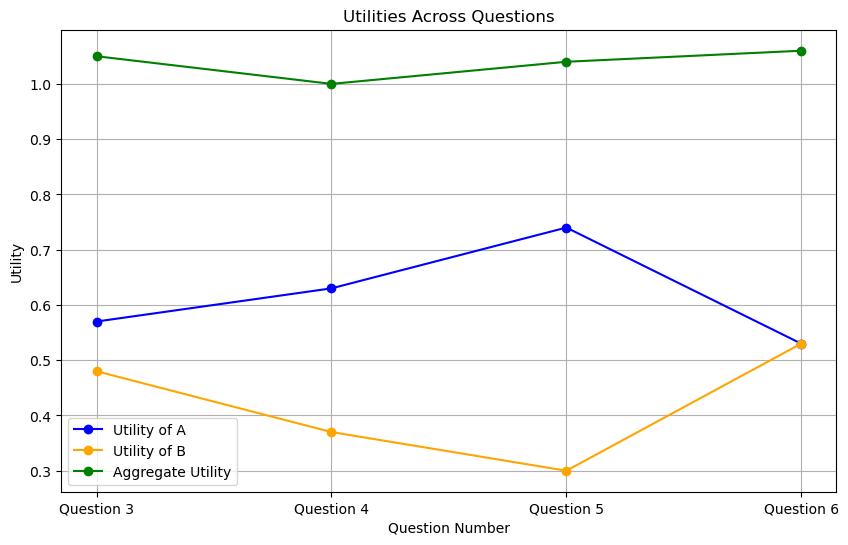

In [30]:
#6.b
# Assign numerical identifiers for each question to be used in plotting.
questions_numbers = np.array([3, 4, 5, 6])

# Create descriptive labels for each question to be displayed on the x-axis.
questions_labels = ['Question 3', 'Question 4', 'Question 5', 'Question 6']

# Store the utility values for consumer A for each question.
uA = np.array([0.57, 0.63, 0.74, 0.53])

# Store the utility values for consumer B for each question.
uB = np.array([0.48, 0.37, 0.3, 0.53])

# Calculate the aggregate utility by adding A's and B's utilities for each question.
uC = uA + uB

# Prepare a plot with specified figure size.
plt.figure(figsize=(10, 6))

# Create a line plot for consumer A's utility, marked with circles at data points.
plt.plot(questions_numbers, uA, '-o', label='Utility of A', color='blue')

# Create a line plot for consumer B's utility, marked with circles at data points.
plt.plot(questions_numbers, uB, '-o', label='Utility of B', color='orange')

# Create a line plot for the aggregate utility, marked with circles at data points.
plt.plot(questions_numbers, uC, '-o', label='Aggregate Utility', color='green')


plt.title('Utilities Across Questions')
plt.xlabel('Question Number')
plt.ylabel('Utility')
plt.xticks(questions_numbers, questions_labels)
plt.grid(True)
plt.legend()
plt.show()


As you can see here are the differt allocations from the different tasks,
We had some problems getting all the allocation in the plot 

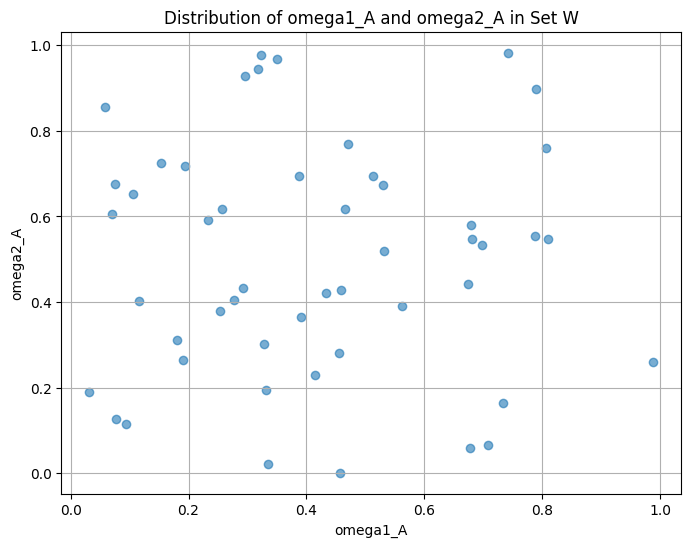

In [57]:
np.random.seed(69)  # For reproducibility
W_omega1_A = np.random.uniform(0, 1, 50)
W_omega2_A = np.random.uniform(0, 1, 50)

# Plot W to visualize the distribution of omega1_A and omega2_A
plt.figure(figsize=(8, 6))
plt.scatter(W_omega1_A, W_omega2_A, alpha=0.6)
plt.title('Distribution of omega1_A and omega2_A in Set W')
plt.xlabel('omega1_A')
plt.ylabel('omega2_A')
plt.grid(True)
plt.show()



Here we shown how the allocation is different form the rest of them

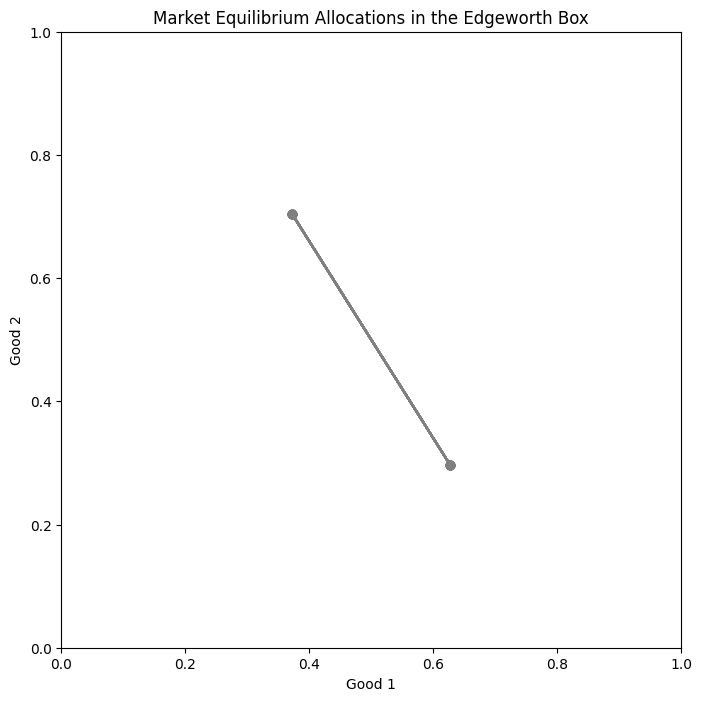

In [73]:
equilibrium_allocations_A = []
equilibrium_allocations_B = []

# Define the total endowment for each good
w1bar = 1.0
w2bar = 1.0

# Find the market equilibrium allocation for each endowment pair
for endowment in zip(W_omega1_A, W_omega2_A):
    # Assuming the initial endowment for the optimization to start is the random endowment
    initial_endowment = list(endowment)
    
    # Define the objective function for optimization
    def objective(prices):
        # Assuming prices[0] is the price of good 1, and price of good 2 is normalized to 1
        p1 = prices[0]
        # Market clearing condition combines the demands from both consumers
        excess_demand = economy.check_market_clearing(p1)
        # Objective is to minimize the square of excess demand, which represents market imbalance
        return excess_demand[0]**2 + excess_demand[1]**2
    
    # Initial guess for the price
    price_guess = [0.5]
    
    # Bounds for the price
    price_bounds = [(0, None)]
    
    # Solve the optimization problem
    result = minimize(objective, price_guess, bounds=price_bounds)
    
    if result.success:
        # Extract the market clearing price
        p1_optimal = result.x[0]
        # Calculate the market equilibrium allocations
        x1A_optimal, x2A_optimal = economy.demand_A(p1_optimal)
        x1B_optimal, x2B_optimal = economy.demand_B(p1_optimal)
        # Store the allocations
        equilibrium_allocations_A.append((x1A_optimal, x2A_optimal))
        equilibrium_allocations_B.append((x1B_optimal, x2B_optimal))

# Now, we can plot the equilibrium allocations in the Edgeworth box
plt.figure(figsize=(8, 8))
for alloc_A, alloc_B in zip(equilibrium_allocations_A, equilibrium_allocations_B):
    plt.plot([alloc_A[0], alloc_B[0]], [alloc_A[1], alloc_B[1]], 'o-', color='grey', alpha=0.5)

plt.title('Market Equilibrium Allocations in the Edgeworth Box')
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.xlim(0, w1bar)
plt.ylim(0, w2bar)
plt.show()

I really dont think this is right, but cant seem to get it right. 
